In [1]:
%pylab inline
from datetime import date
from app import create_app
from app.instrument import Instrument
from app.analysis import Quote
mappings= {'BRK.B': 'BRK-B'}
with create_app().app_context():
    provided = ['MUB', 'PGX', 'VNQ', 'SPLV']
    quote = Quote([b.symbol if b.symbol not in mappings else mappings[b.symbol]
                   for b in Instrument.find_stocks(100)] + provided, 100)
f'from {quote.start.date()} to {date.today()}'

Populating the interactive namespace from numpy and matplotlib


'from 2019-02-26 to 2019-06-06'

In [2]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 12) & (stat['21-mean'] > 1.2)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
KO,50,3.467480,1.311880,2.508281,3.383611
SHOP,50,14.848504,9.550523,1.536208,6.171438
ZNGA,50,6.990197,4.690543,1.452557,4.700161
NTDOY,50,10.220613,7.102790,1.414049,7.386100
SBUX,50,3.976485,2.765968,1.373685,4.600183
SPLV,50,1.538454,1.016868,1.338952,1.971361
V,50,3.117625,2.308153,1.274053,4.317938
ENPH,50,25.626499,20.047631,1.269456,6.875388
PYPL,50,4.731608,3.683034,1.236668,7.332929


In [3]:
quote.setup_mask([*stat.index, *provided])
quote.least_correlated_portfolio(21, 6, provided)

['MUB', 'PGX', 'VNQ', 'SPLV', 'KO', 'SHOP'] 7.911223185441553 13.492237623086531 5.773508304785777 -11.354522742430756
['MUB', 'PGX', 'VNQ', 'SPLV', 'SHOP', 'ZNGA'] 6.1463426263991 10.342495827819967 6.102645779814783 -10.298798981235649
['MUB', 'PGX', 'VNQ', 'SPLV', 'SHOP', 'NTDOY'] 4.270080763673741 7.756241907273445 6.774130483248827 -10.260291626848531
['MUB', 'PGX', 'VNQ', 'SPLV', 'SHOP', 'DIS'] 3.6279741364504545 6.763990791441154 6.460624645419577 -9.596641300410276


['MUB', 'PGX', 'VNQ', 'SPLV', 'SHOP', 'DIS']

In [4]:
quote.setup_mask([*stat.index, *provided])
quote.least_correlated_portfolio(21, 6, provided + ['NTDOY'])

['MUB', 'PGX', 'VNQ', 'SPLV', 'NTDOY', 'KO'] 8.737023255317034 13.892213951698707 6.077173788329992 -11.232364484711667
['MUB', 'PGX', 'VNQ', 'SPLV', 'NTDOY', 'SHOP'] 4.2700807636737395 7.756241907273443 6.774130483248827 -10.260291626848531


['MUB', 'PGX', 'VNQ', 'SPLV', 'NTDOY', 'SHOP']

In [5]:
quote.setup_mask(['NTDOY', 'SHOP'])
quote.find_optimal_ratio(21, 10)

/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(Symbols
 NTDOY    0.675494
 SHOP     0.324506
 dtype: float64, 11.7224, 6.1829)

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,50.0,11.686164,6.176127,2.499173,6.047136,9.572014,16.983756,24.534714,1.863506,5.039477
SHOP,50.0,14.848504,9.550523,1.781530,7.434913,11.613205,23.085944,36.338890,1.536208,6.171438
NTDOY,50.0,10.220613,7.102790,-1.587664,4.247562,9.809697,14.693490,27.448683,1.414049,7.386100


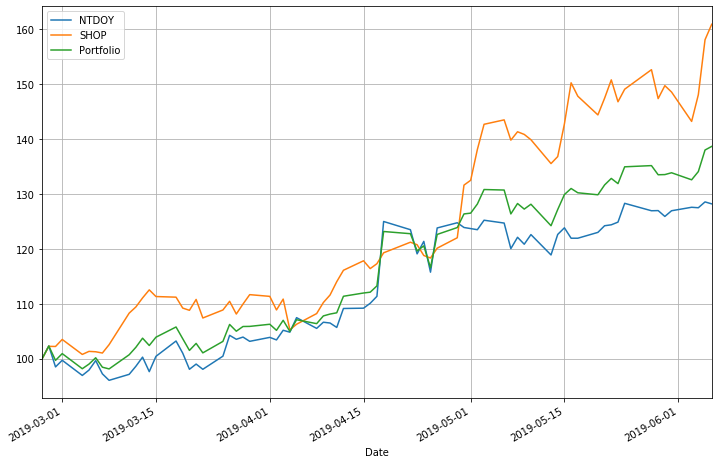

In [6]:
quote.graph(21, {'NTDOY': .68, 'SHOP': .32})